<a href="https://colab.research.google.com/github/Beta628427/Tesis/blob/master/RNeuronal_Beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Red Neuronal

import numpy as np # Numeros
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

(400, 1)


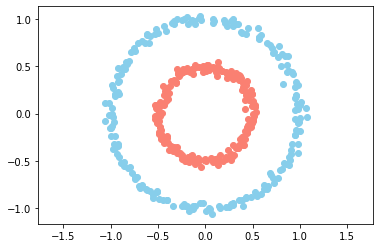

In [2]:
# Crear el dataset

n = 400
p = 2

X, y = make_circles(n_samples=n, factor= 0.5, noise= 0.03)

y = y[:, np.newaxis]

print(y.shape)

plt.scatter(X[ y[:,0]==0 ,0], X[ y[:,0]==0 ,1], c= "skyblue")
plt.scatter(X[ y[:,0]==1 ,0], X[ y[:,0]==1 ,1], c= "salmon")
plt.axis("equal")
plt.show()

In [3]:
y.shape

(400, 1)

In [0]:
# Clase de capa de red

class neural_layer():

  # n_conn = numero de conecciones
  # n_neur = numero de neuronas
  # act_f  = funcion de activación

  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    # ventor columna (1)
    self.b     = np.random.rand(1,n_neur) * 2 -1
    self.w     = np.random.rand(n_conn, n_neur) 


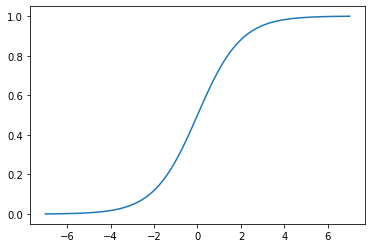

In [5]:
# Funciones de activación

# Sigmoido
sign = (lambda x: 1/ (1 + np.e **(-x)),
        lambda x: x * (1-x))

# Relu
relu = (lambda x: np.maximum(0, x))

_x = np.linspace(-7, 7, 100)

plt.plot(_x, sign[0](_x))

In [0]:
layer0 = neural_layer(p, 4, sign)
Layer1 = neural_layer(4, 8, sign)
# ....

def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn



In [7]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sign)

# Yp = predicha
# Yr = Real

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  out = [(None, X)]
  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    out.append((z, a))
  if train:
    # Backward pass
    deltas = []
    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      if l == len(neural_net) - 1:
        # calculamos delta de ultima capa
        # formula de delta0
        deltas.insert(0, l2_cost[1](a, y) * neural_net[l].act_f[1](a))
        #print(deltas.shape)
      else:
        # calcular delta respecto a capa previa
        deltas.insert(0, deltas[0]@neural_net[l+1].w.T*neural_net[l].act_f[1](a))
      _w = neural_net[l].w
      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims= True) * lr
      neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr
  return out[-1][1]


train(neural_net, X, y, l2_cost, 0.5)

array([[0.86263674],
       [0.89847787],
       [0.82797547],
       [0.80208088],
       [0.85089799],
       [0.8639554 ],
       [0.79645749],
       [0.86260887],
       [0.8230358 ],
       [0.89659189],
       [0.83031915],
       [0.79046248],
       [0.86330211],
       [0.80638296],
       [0.79989303],
       [0.85469246],
       [0.746341  ],
       [0.84112094],
       [0.83446631],
       [0.79150921],
       [0.86383401],
       [0.87440195],
       [0.83699405],
       [0.85308334],
       [0.89574903],
       [0.79609409],
       [0.81999665],
       [0.86303895],
       [0.90075529],
       [0.90088583],
       [0.89742211],
       [0.86919836],
       [0.82962244],
       [0.84684536],
       [0.79230913],
       [0.86877598],
       [0.89743658],
       [0.76997428],
       [0.78584422],
       [0.89087157],
       [0.89912441],
       [0.83581275],
       [0.90002022],
       [0.81312887],
       [0.78895809],
       [0.87220542],
       [0.89872535],
       [0.891

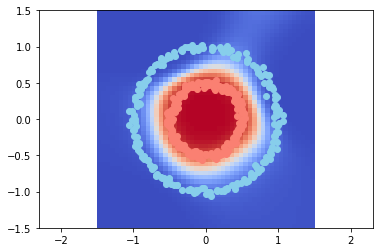

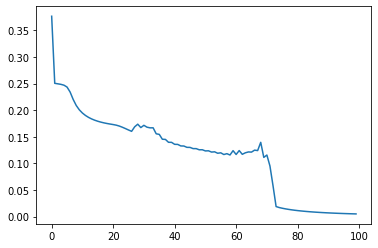

In [8]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sign)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[y[:,0] == 0, 0], X[y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[y[:,0] == 1, 0], X[y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  